In [91]:
import os
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

In [121]:
image_path = "data/abstract_art/abstract_art_512/"
batch_size = 4
device = torch.device("cuda")

In [93]:
# class ToTensor ():
#     def __call__(self, image):
#         print(image)
#         return image

In [111]:
# mb add resize -> transforms.Resize(64)
composed_transform = torchvision.transforms.Compose([transforms.Grayscale(num_output_channels=1), transforms.ToTensor()])

In [112]:
class AbstractArtDataset(Dataset):
    def __init__(self, image_path, transforms):
        self.transforms = transforms
        self.image_path = image_path
        self.image_names = [name for name in os.listdir(self.image_path) if os.path.isfile(os.path.join(self.image_path, name))]
    def __len__ (self):
        return len(self.image_names)
    def __getitem__(self, idx):
        image_location = os.path.join(self.image_path, self.image_names[idx])
        image = Image.open(image_location).convert('RGB')
        image = self.transforms(image)
        return image

In [113]:
image_dataset = AbstractArtDataset(image_path, composed_transform)

In [114]:
image_loader = DataLoader(dataset=image_dataset, batch_size=batch_size, shuffle=True)

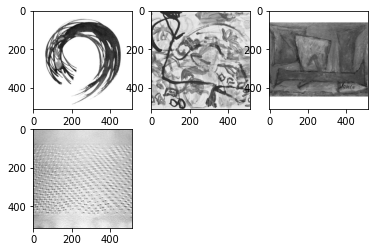

In [120]:
images = iter(image_loader).next()

for i in range(4):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i].view(512, 512), cmap="gray")
#     plt.imshow(images[i].permute(1, 2, 0))